<a href="https://colab.research.google.com/github/AishuShans/Task-3-AI-and-ML-intern-/blob/main/task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
try:
    df = pd.read_csv('co2_data.csv')
except FileNotFoundError:
    print("Error: 'co2_data.csv' not found. Please make sure the file is uploaded to your Colab environment.")
    exit()

Displaying the first few rows to understand the dataset


In [3]:
print("First 5 rows of the dataset:")
print(df.head())
print("\n")

First 5 rows of the dataset:
    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                             

Get some basic information about the dataset

In [4]:
print("Dataset information:")
df.info()
print("\n")

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null 

checking for missing values

In [5]:
print("Missing values per column:")
print(df.isnull().sum())
print("\n")

Missing values per column:
Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64




Step 1 : Select the feature and the target

creating the feature matrix(X) and the target vector(Y)

In [8]:
feature = 'Engine Size(L)'
target = 'CO2 Emissions(g/km)'

In [9]:
X = df[[feature]]
y = df[target]

In [10]:
print(f"Feature (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print("\n")


Feature (X) shape: (7385, 1)
Target (y) shape: (7385,)




Step 2 : Splitting dataset into train test sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print("\n")

X_train shape: (5908, 1)
X_test shape: (1477, 1)
y_train shape: (5908,)
y_test shape: (1477,)




Step 3 : Fitting a Linear Regression model using sklearn.linear_model

Creating a Linear Regression model object

In [13]:
model = LinearRegression()

Training the model using the training data

In [14]:
model.fit(X_train, y_train)


LinearRegression()

In [15]:
print("Linear Regression model trained successfully!")
print("\n")

Linear Regression model trained successfully!




Step 4: Evaluating model using MAE, MSE, R²

In [16]:
y_pred = model.predict(X_test)

Calculating evaluation metrics

In [17]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [18]:
print("Model Evaluation Metrics (Test Set):")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print("\n")


Model Evaluation Metrics (Test Set):
Mean Absolute Error (MAE): 22.93
Mean Squared Error (MSE): 949.99
R-squared (R²): 0.72




Plotting regression line and interpret coefficients

Plot the training data points

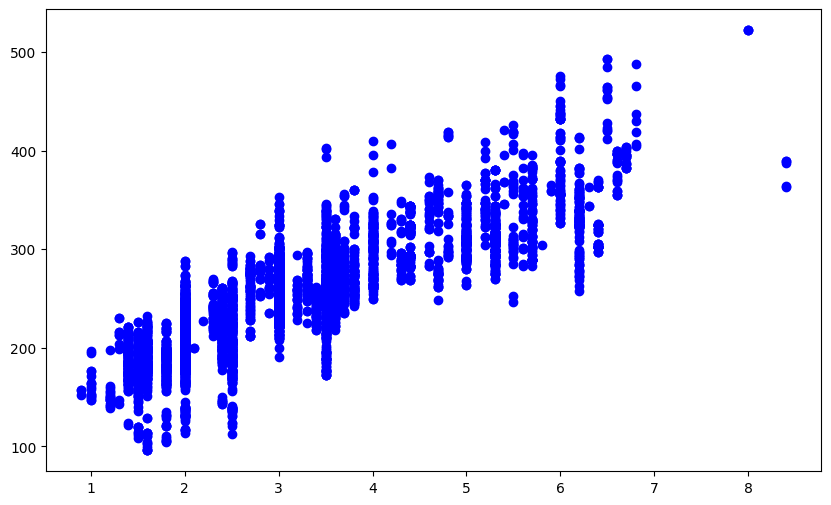

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')

Plot the test data points

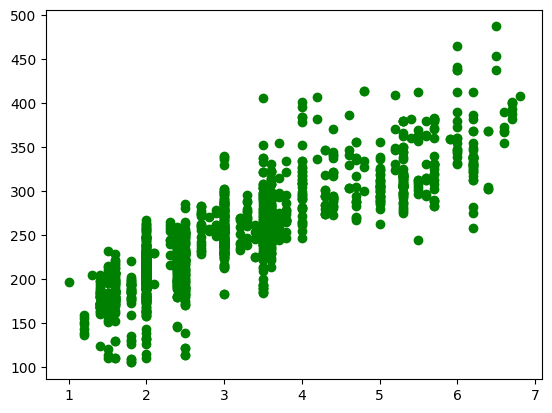

In [20]:
plt.scatter(X_test, y_test, color='green', label='Testing Data')

Plot the regression line

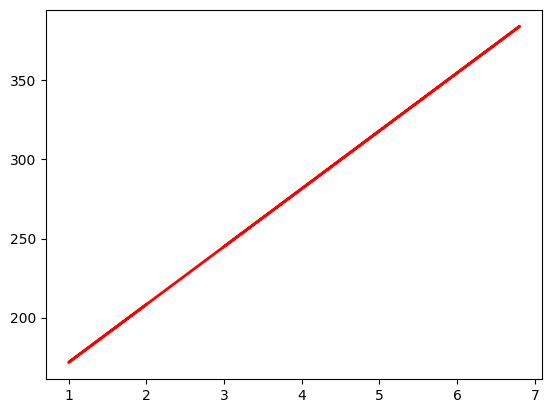

In [21]:
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

Adding labels and title

<ipython-input-22-f82a495f4d2a>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


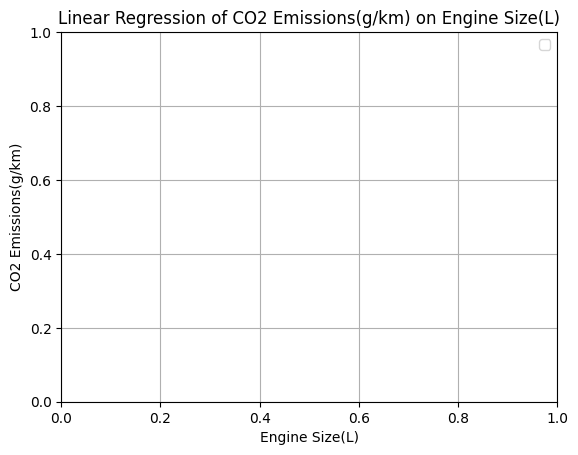

In [22]:
plt.xlabel(feature)
plt.ylabel(target)
plt.title(f'Linear Regression of {target} on {feature}')
plt.legend()
plt.grid(True)
plt.show()

 Interpret the coefficients

In [23]:
slope = model.coef_[0]
intercept = model.intercept_

In [24]:
print("Model Coefficients:")
print(f"Slope (Coefficient for '{feature}'): {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print("\n")

print("Interpretation of Coefficients:")
print(f"- A slope of {slope:.2f} means that for every 1 unit increase in '{feature}', the '{target}' is predicted to increase by approximately {slope:.2f} g/km.")
print(f"- An intercept of {intercept:.2f} is the predicted value of '{target}' when '{feature}' is 0. However, in the context of engine size, a value of 0 might not be physically meaningful, so the intercept should be interpreted cautiously.")

Model Coefficients:
Slope (Coefficient for 'Engine Size(L)'): 36.61
Intercept: 135.06


Interpretation of Coefficients:
- A slope of 36.61 means that for every 1 unit increase in 'Engine Size(L)', the 'CO2 Emissions(g/km)' is predicted to increase by approximately 36.61 g/km.
- An intercept of 135.06 is the predicted value of 'CO2 Emissions(g/km)' when 'Engine Size(L)' is 0. However, in the context of engine size, a value of 0 might not be physically meaningful, so the intercept should be interpreted cautiously.
